In [1]:
# CDC data https://wwwn.cdc.gov/nchs/nhanes/Default.aspx

import pandas as pd
%matplotlib inline

import seaborn as sns


diabetes = pd.read_sas('../data/diabetes.xpt', encoding='unicode-escape')

diabetes.head()


,SEQN,DIQ010,DID040,DIQ160,DIQ170,DIQ172,DIQ175A,DIQ175B,DIQ175C,DIQ175D,...,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080
0,73557.0,1.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9999.0,6666.0,6666.0,5555.0,NaN,2.0,5.397605e-79,NaN,4.0,2.0
1,73558.0,1.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.0,9999.0,9999.0,147.0,147.0,6.0,1.000000e+00,1.0,1.0,1.0
2,73559.0,1.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,6666.0,6666.0,9999.0,6666.0,2.0,1.000000e+00,1.0,2.0,2.0
3,73560.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
sleep = pd.read_sas('../data/sleep_disorder.xpt', encoding='unicode-escape')

sleep_columns = ['id', 'hour_sleep', 'has_disorder', 'diag_disorder']

sleep.columns = sleep_columns

sleep.head()
sleep.describe()

,id,hour_sleep,has_disorder,diag_disorder
count,6464.000000,6461.000000,6464.000000,6464.000000
mean,78682.877011,7.050302,1.757426,1.924505
std,2923.654158,3.347950,0.448430,0.427139
min,73557.000000,2.000000,1.000000,1.000000
25%,76175.500000,6.000000,2.000000,2.000000
50%,78735.500000,7.000000,2.000000,2.000000
75%,81203.250000,8.000000,2.000000,2.000000
max,83729.000000,99.000000,9.000000,9.000000


In [3]:
sleep['h_disorder'] = sleep['has_disorder'].apply(lambda x: 1 if x==1 else 0)
sleep.head()

,id,hour_sleep,has_disorder,diag_disorder,h_disorder
0,73557.0,7.0,1.0,2.0,1
1,73558.0,9.0,2.0,2.0,0
2,73559.0,8.0,2.0,2.0,0
3,73561.0,9.0,2.0,2.0,0
4,73562.0,5.0,2.0,1.0,0


In [4]:
sleep['d_disorder'] = sleep['diag_disorder'].apply(lambda x: 1 if x==1 else 0)
sleep.head()

,id,hour_sleep,has_disorder,diag_disorder,h_disorder,d_disorder
0,73557.0,7.0,1.0,2.0,1,0
1,73558.0,9.0,2.0,2.0,0,0
2,73559.0,8.0,2.0,2.0,0,0
3,73561.0,9.0,2.0,2.0,0,0
4,73562.0,5.0,2.0,1.0,0,1


In [5]:
sleep['hour_sleep'] = sleep['hour_sleep'].apply(lambda x: 7 if x==99 else x)
sleep.groupby('hour_sleep').size()

hour_sleep
2.0       22
3.0       41
4.0      240
5.0      557
6.0     1507
7.0     1714
8.0     1790
9.0      366
10.0     168
11.0      10
12.0      46
dtype: int64

In [6]:
sleep['hour_sleep'] = sleep['hour_sleep'].fillna(7)
sleep.isnull().any()

id               False
hour_sleep       False
has_disorder     False
diag_disorder    False
h_disorder       False
d_disorder       False
dtype: bool

In [7]:
diabetes.drop(diabetes.columns[3:], axis=1, inplace=True)

#r_diabetes.head()

In [8]:
diabetes_column = ['id', 'd_diabetes', 'diabetes_age']
diabetes.columns = diabetes_column
diabetes.head()

,id,d_diabetes,diabetes_age
0,73557.0,1.0,62.0
1,73558.0,1.0,23.0
2,73559.0,1.0,57.0
3,73560.0,2.0,NaN
4,73561.0,2.0,NaN


In [9]:
diabetes['d_diabetes'] = diabetes['d_diabetes'].apply(lambda x: 1 if x==1 or x==3 else 0)
diabetes.head()

,id,d_diabetes,diabetes_age
0,73557.0,1,62.0
1,73558.0,1,23.0
2,73559.0,1,57.0
3,73560.0,0,NaN
4,73561.0,0,NaN


In [10]:
diabetes['diabetes_age'] = diabetes['diabetes_age'].fillna(0)

## only 2 are 666 -> age less than 1, change to 1
diabetes.loc[diabetes.diabetes_age == 666, 'diabetes_age']= 1
diabetes[diabetes.diabetes_age == 666]

,id,d_diabetes,diabetes_age


In [ ]:
## findings mean of age of diabetes
diabetes[(diabetes.diabetes_age < 81) & (diabetes.diabetes_age > 0)].mean()

In [11]:
# age 999 means unknow, we can change with mean 
diabetes.loc[diabetes.diabetes_age == 999, 'diabetes_age'] = 48


In [12]:
## age columns is clean now
diabetes[diabetes.diabetes_age > 80]

,id,d_diabetes,diabetes_age


In [13]:
sleep_diabetes = pd.merge(sleep, diabetes, on='id')

In [18]:
sp = sleep_diabetes.drop(['has_disorder','h_disorder','diag_disorder', 'diabetes_age'], axis =1)
sp.head()

,id,hour_sleep,d_disorder,d_diabetes
0,73557.0,7.0,0,1
1,73558.0,9.0,0,1
2,73559.0,8.0,0,1
3,73561.0,9.0,0,0
4,73562.0,5.0,1,0


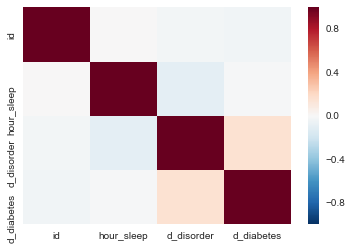

In [19]:
import seaborn as sns
%matplotlib inline
sns.heatmap(sp.corr())

In [20]:
# add more variables, 
# plot corredtion martix 
# for just 2 features need to plot to see any relation between them
%pylab inline
sns.set_style('whitegrid')
##print last_year
# using plot and the '.' notation.
#plt.figure(figsize=(8, 6), dpi=80)
#plt.subplot(1, 1, 1)
#plt.plot(sp.hour_sleep, sp.d_diabetes, '.')

Populating the interactive namespace from numpy and matplotlib


In [21]:
#load demographic data
demo = pd.read_sas('../data/DEMO_H.XPT', encoding='unicode-escape')
demo.head()


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557.0,8.0,2.0,1.0,69.0,NaN,4.0,4.0,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1.0,112.0,4.0,4.0,0.84
1,73558.0,8.0,2.0,1.0,54.0,NaN,3.0,3.0,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1.0,108.0,7.0,7.0,1.78
2,73559.0,8.0,2.0,1.0,72.0,NaN,3.0,3.0,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1.0,109.0,10.0,10.0,4.51
3,73560.0,8.0,2.0,1.0,9.0,NaN,3.0,3.0,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2.0,109.0,9.0,9.0,2.52
4,73561.0,8.0,2.0,2.0,73.0,NaN,3.0,3.0,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2.0,116.0,15.0,15.0,5.00


In [22]:
demo_new = demo.drop(['SDDSRVYR', 'RIDSTATR', 'RIDAGEMN', 'RIDRETH1','RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC'], axis = 1)
demo_new.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557.0,1.0,69.0,4.0,1.0,1.0,NaN,NaN,3.0,4.0,...,3.0,4.0,NaN,13281.237386,13481.042095,1.0,112.0,4.0,4.0,0.84
1,73558.0,1.0,54.0,3.0,1.0,1.0,NaN,NaN,3.0,1.0,...,3.0,1.0,1.0,23682.057386,24471.769625,1.0,108.0,7.0,7.0,1.78
2,73559.0,1.0,72.0,3.0,1.0,1.0,NaN,NaN,4.0,1.0,...,4.0,1.0,3.0,57214.803319,57193.285376,1.0,109.0,10.0,10.0,4.51
3,73560.0,1.0,9.0,3.0,1.0,1.0,NaN,3.0,NaN,NaN,...,3.0,1.0,4.0,55201.178592,55766.512438,2.0,109.0,9.0,9.0,2.52
4,73561.0,2.0,73.0,3.0,1.0,1.0,NaN,NaN,5.0,1.0,...,5.0,1.0,5.0,63709.667069,65541.871229,2.0,116.0,15.0,15.0,5.00


In [23]:
_demo1 = demo_new.drop(demo_new.columns[4:36], axis=1)
_demo = _demo1.drop(['INDFMIN2', 'INDFMPIR'], axis=1)
_demo.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,INDHHIN2
0,73557.0,1.0,69.0,4.0,4.0
1,73558.0,1.0,54.0,3.0,7.0
2,73559.0,1.0,72.0,3.0,10.0
3,73560.0,1.0,9.0,3.0,9.0
4,73561.0,2.0,73.0,3.0,15.0


In [24]:
demoColumn = ['id', 'gender', 'age', 'race', 'house_hold']
_demo.columns = demoColumn
_demo.head()

,id,gender,age,race,house_hold
0,73557.0,1.0,69.0,4.0,4.0
1,73558.0,1.0,54.0,3.0,7.0
2,73559.0,1.0,72.0,3.0,10.0
3,73560.0,1.0,9.0,3.0,9.0
4,73561.0,2.0,73.0,3.0,15.0


In [25]:
_demo['house_hold'] = _demo['house_hold'].fillna(99)
_demo.isnull().any()

id            False
gender        False
age           False
race          False
house_hold    False
dtype: bool

In [26]:
sd_1 = pd.merge(sp, _demo, on='id')
sd_1.head()

,id,hour_sleep,d_disorder,d_diabetes,gender,age,race,house_hold
0,73557.0,7.0,0,1,1.0,69.0,4.0,4.0
1,73558.0,9.0,0,1,1.0,54.0,3.0,7.0
2,73559.0,8.0,0,1,1.0,72.0,3.0,10.0
3,73561.0,9.0,0,0,2.0,73.0,3.0,15.0
4,73562.0,5.0,1,0,1.0,56.0,1.0,9.0


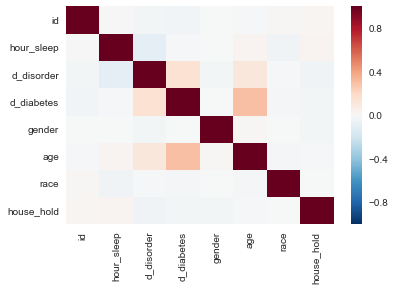

In [28]:
#sd_1.drop(['diag_disorder'], axis=1, inplace=True)
sns.heatmap(sd_1.corr())

In [29]:
race_column = pd.get_dummies(sd_1['race'], prefix='race_')
sd_race = pd.concat([sd_1, race_column], axis=1)
sd_race.head()

,id,hour_sleep,d_disorder,d_diabetes,gender,age,race,house_hold,race__1.0,race__2.0,race__3.0,race__4.0,race__6.0,race__7.0
0,73557.0,7.0,0,1,1.0,69.0,4.0,4.0,0,0,0,1,0,0
1,73558.0,9.0,0,1,1.0,54.0,3.0,7.0,0,0,1,0,0,0
2,73559.0,8.0,0,1,1.0,72.0,3.0,10.0,0,0,1,0,0,0
3,73561.0,9.0,0,0,2.0,73.0,3.0,15.0,0,0,1,0,0,0
4,73562.0,5.0,1,0,1.0,56.0,1.0,9.0,1,0,0,0,0,0


In [30]:
income_column = pd.get_dummies(sd_race['house_hold'], prefix='inc_')
sd_f = pd.concat([sd_race, income_column], axis=1)
sd_final = sd_f.drop('id', axis =1)
#get null value
sd_final['d_diabetes'].value_counts() / sd_final.shape[0]

0    0.859684
1    0.140316
Name: d_diabetes, dtype: float64

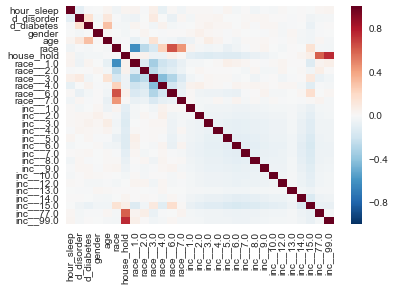

In [31]:
sns.heatmap(sd_final.corr())


In [32]:
sd_X = sd_final.drop(['d_diabetes', 'race','house_hold'], axis = 1)
sd_y = sd_final['d_diabetes']


In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(sd_X, sd_y)

# check the accuracy on the training set
model.score(sd_X, sd_y)

0.85767326732673266

In [34]:
# print the coefficients
print model.intercept_
print model.coef_

[-3.38819083]
[[ -4.54902295e-02   1.01580953e+00  -6.51276893e-02   5.24993181e-02
   -2.34420567e-01  -5.18647905e-01  -1.03250420e+00  -4.35943418e-01
   -6.28534741e-01  -5.38140002e-01   1.27292568e-01  -1.04513705e-01
   -6.37256498e-02  -1.48012649e-01  -3.09106645e-04  -1.63325621e-01
   -9.17297805e-02  -4.20468086e-01  -2.44092456e-02   9.07053910e-02
   -5.04251225e-01  -6.62002012e-01  -1.41268078e-01  -5.06884759e-01
   -6.07638882e-01  -1.67649994e-01]]


In [35]:
sd_X.describe()

,hour_sleep,d_disorder,gender,age,race__1.0,race__2.0,race__3.0,race__4.0,race__6.0,race__7.0,...,inc__7.0,inc__8.0,inc__9.0,inc__10.0,inc__12.0,inc__13.0,inc__14.0,inc__15.0,inc__77.0,inc__99.0
count,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,...,6464.000000,6464.000000,6464.000000,6464.000000,6464.00000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000
mean,6.950650,0.089573,1.521658,45.704053,0.143874,0.089264,0.411046,0.207302,0.116337,0.032178,...,0.090037,0.076887,0.055693,0.040068,0.03651,0.011139,0.082302,0.181312,0.025835,0.022432
std,1.427025,0.285591,0.499569,19.282154,0.350989,0.285146,0.492062,0.405405,0.320653,0.176487,...,0.286257,0.266433,0.229346,0.196134,0.18757,0.104958,0.274846,0.385306,0.158656,0.148095
min,2.000000,0.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,2.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,0.000000,2.000000,62.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,1.000000,2.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier  # compare to knn
knn = KNeighborsClassifier(n_neighbors=20)
cross_val_score(knn, sd_X, sd_y, cv=5, scoring='accuracy').mean()

/Users/chi-chunwang/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.85984012900694329

In [37]:
sd_final.groupby('d_diabetes').size()

d_diabetes
0    5557
1     907
dtype: int64

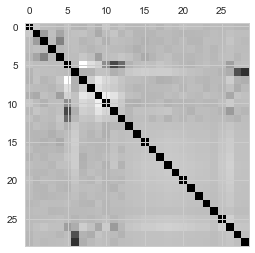

In [38]:
plt.matshow(sd_final.corr())

In [39]:
from pandas.tools.plotting import scatter_matrix


In [40]:
sd_corr = sd_final.corr()
print sd_corr

            hour_sleep  d_disorder  d_diabetes    gender       age      race  \
hour_sleep    1.000000   -0.100391   -0.009440 -0.000128  0.024616 -0.043791   
d_disorder   -0.100391    1.000000    0.150921 -0.026071  0.109899 -0.012872   
d_diabetes   -0.009440    0.150921    1.000000 -0.007262  0.304012 -0.023407   
gender       -0.000128   -0.026071   -0.007262  1.000000  0.008223 -0.007618   
age           0.024616    0.109899    0.304012  0.008223  1.000000 -0.017789   
race         -0.043791   -0.012872   -0.023407 -0.007618 -0.017789  1.000000   
house_hold    0.027988   -0.041240   -0.025996 -0.024374 -0.013646 -0.003373   
race__1.0     0.033949   -0.054493    0.024757 -0.000126 -0.085842 -0.618641   
race__2.0    -0.011987   -0.005099    0.003184  0.026072 -0.025925 -0.267751   
race__3.0     0.057318    0.086987   -0.031521 -0.004435  0.141132 -0.168249   
race__4.0    -0.085550   -0.005383    0.040631 -0.013769 -0.017981  0.231379   
race__6.0     0.011873   -0.071570   -0.

In [41]:
type(sd_corr)
sd_corr_diabetes = sd_corr['d_diabetes']
##scatter_matrix(sd_corr['d_diabetes', 'd_disorder'])
type(sd_corr_diabetes)

pandas.core.series.Series

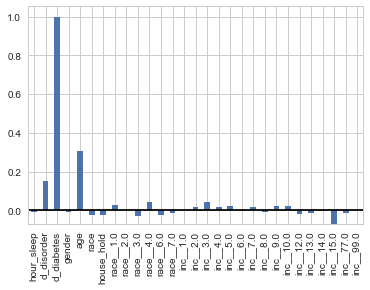

In [42]:
plt.figure();
sd_corr.ix[2].plot.bar() 
plt.axhline(0, color='k')